In [ ]:
# ---------------------------------------------------------------
# Step 1: Load required packages
# ---------------------------------------------------------------
# pip install cbsodata pandas
import pandas as pd

# The official CBS StatLine Python client
import cbsodata  # https://pypi.org/project/cbsodata/

# ---------------------------------------------------------------
# Step 2: Download the full dataset for 2018
# ---------------------------------------------------------------
# Table: "Kerncijfers wijken en buurten"
TABLE_ID = "84286NED"

# Pull data filtered to 2018. If your Perioden code differs (e.g., "2018JJ00"),
# change the value below accordingly.
rows = cbsodata.get_data(TABLE_ID, filters={"Perioden": "2018"})
cbs_data_2018 = pd.DataFrame(rows)

# View structure
print(cbs_data_2018.info())
print(cbs_data_2018.head())

# Save to CSV (optional)
cbs_data_2018.to_csv("cbs_data_2018.csv", index=False)

In [2]:
import pandas as pd

# Example: load your CBS dataset
cbs_data_2018 = pd.read_csv("cbs_data_2018.csv")

#print fist five rows of the dataframe
print(cbs_data_2018.head())

# To see all column names, uncomment the line below
printvariablenames = cbs_data_2018.columns.tolist()
print(printvariablenames)

import pandas as pd

# Dictionary mapping Dutch variable names to English
translate_dict = {
    'ID': 'id',
    'WijkenEnBuurten': 'district_or_neighbourhood',
    'Gemeentenaam_1': 'municipality_name',
    'SoortRegio_2': 'region_type',
    'Codering_3': 'region_code',
    'IndelingswijzigingWijkenEnBuurten_4': 'boundary_change_indicator',
    'AantalInwoners_5': 'population_total',
    'Mannen_6': 'male_population',
    'Vrouwen_7': 'female_population',
    'k_0Tot15Jaar_8': 'age_0_to_15',
    'k_15Tot25Jaar_9': 'age_15_to_25',
    'k_25Tot45Jaar_10': 'age_25_to_45',
    'k_45Tot65Jaar_11': 'age_45_to_65',
    'k_65JaarOfOuder_12': 'age_65_plus',
    'Ongehuwd_13': 'unmarried',
    'Gehuwd_14': 'married',
    'Gescheiden_15': 'divorced',
    'Verweduwd_16': 'widowed',
    'WestersTotaal_17': 'western_total',
    'NietWestersTotaal_18': 'non_western_total',
    'Marokko_19': 'morocco_origin',
    'NederlandseAntillenEnAruba_20': 'dutch_antilles_aruba_origin',
    'Suriname_21': 'suriname_origin',
    'Turkije_22': 'turkey_origin',
    'OverigNietWesters_23': 'other_non_western',
    'GeboorteTotaal_24': 'births_total',
    'GeboorteRelatief_25': 'births_relative',
    'SterfteTotaal_26': 'deaths_total',
    'SterfteRelatief_27': 'deaths_relative',
    'HuishoudensTotaal_28': 'households_total',
    'Eenpersoonshuishoudens_29': 'single_person_households',
    'HuishoudensZonderKinderen_30': 'households_without_children',
    'HuishoudensMetKinderen_31': 'households_with_children',
    'GemiddeldeHuishoudensgrootte_32': 'average_household_size',
    'Bevolkingsdichtheid_33': 'population_density',
    'Woningvoorraad_34': 'housing_stock',
    'GemiddeldeWOZWaardeVanWoningen_35': 'average_woz_value',
    'PercentageEengezinswoning_36': 'pct_single_family_homes',
    'PercentageMeergezinswoning_37': 'pct_multi_family_homes',
    'PercentageBewoond_38': 'pct_occupied_homes',
    'PercentageOnbewoond_39': 'pct_unoccupied_homes',
    'Koopwoningen_40': 'owner_occupied_homes',
    'HuurwoningenTotaal_41': 'rental_homes_total',
    'InBezitWoningcorporatie_42': 'owned_by_housing_corp',
    'InBezitOverigeVerhuurders_43': 'owned_by_other_landlords',
    'EigendomOnbekend_44': 'ownership_unknown',
    'BouwjaarVoor2000_45': 'built_before_2000',
    'BouwjaarVanaf2000_46': 'built_after_2000',
    'GemiddeldElektriciteitsverbruikTotaal_47': 'avg_electricity_use_total',
    'Appartement_48': 'apartment_electricity_use',
    'Tussenwoning_49': 'terraced_house_electricity_use',
    'Hoekwoning_50': 'corner_house_electricity_use',
    'TweeOnderEenKapWoning_51': 'semi_detached_electricity_use',
    'VrijstaandeWoning_52': 'detached_house_electricity_use',
    'Huurwoning_53': 'rental_house_electricity_use',
    'EigenWoning_54': 'owner_house_electricity_use',
    'GemiddeldAardgasverbruikTotaal_55': 'avg_gas_use_total',
    'Appartement_56': 'apartment_gas_use',
    'Tussenwoning_57': 'terraced_house_gas_use',
    'Hoekwoning_58': 'corner_house_gas_use',
    'TweeOnderEenKapWoning_59': 'semi_detached_gas_use',
    'VrijstaandeWoning_60': 'detached_house_gas_use',
    'Huurwoning_61': 'rental_house_gas_use',
    'EigenWoning_62': 'owner_house_gas_use',
    'PercentageWoningenMetStadsverwarming_63': 'pct_district_heating',
    'Nettoarbeidsparticipatie_64': 'net_labour_participation',
    'PercentageWerknemers_65': 'pct_employees',
    'PercentageZelfstandigen_66': 'pct_self_employed',
    'AantalInkomensontvangers_67': 'income_receivers_total',
    'GemiddeldInkomenPerInkomensontvanger_68': 'avg_income_per_receiver',
    'GemiddeldInkomenPerInwoner_69': 'avg_income_per_capita',
    'k_40PersonenMetLaagsteInkomen_70': 'pct_people_lowest_40_income',
    'k_20PersonenMetHoogsteInkomen_71': 'pct_people_highest_20_income',
    'GemGestandaardiseerdInkomenVanHuish_72': 'avg_standardized_household_income',
    'k_40HuishoudensMetLaagsteInkomen_73': 'pct_households_lowest_40_income',
    'k_20HuishoudensMetHoogsteInkomen_74': 'pct_households_highest_20_income',
    'HuishoudensMetEenLaagInkomen_75': 'households_low_income',
    'HuishOnderOfRondSociaalMinimum_76': 'households_around_social_minimum',
    'HuishoudensTot110VanSociaalMinimum_77': 'households_upto_110pct_social_minimum',
    'HuishoudensTot120VanSociaalMinimum_78': 'households_upto_120pct_social_minimum',
    'MediaanVermogenVanParticuliereHuish_79': 'median_private_household_wealth',
    'PersonenPerSoortUitkeringBijstand_80': 'people_with_benefit_social_assistance',
    'PersonenPerSoortUitkeringAO_81': 'people_with_disability_benefit',
    'PersonenPerSoortUitkeringWW_82': 'people_with_unemployment_benefit',
    'PersonenPerSoortUitkeringAOW_83': 'people_with_state_pension',
    'JongerenMetJeugdzorgInNatura_84': 'youth_with_care_in_kind',
    'PercentageJongerenMetJeugdzorg_85': 'pct_youth_with_care',
    'WmoClienten_86': 'wmo_clients',
    'WmoClientenRelatief_87': 'wmo_clients_relative',
    'TotaalDiefstalUitWoningSchuurED_88': 'total_burglary_theft',
    'VernielingMisdrijfTegenOpenbareOrde_89': 'vandalism_public_order_offenses',
    'GeweldsEnSeksueleMisdrijven_90': 'violent_and_sexual_offenses',
    'BedrijfsvestigingenTotaal_91': 'business_establishments_total',
    'ALandbouwBosbouwEnVisserij_92': 'agriculture_forestry_fishing',
    'BFNijverheidEnEnergie_93': 'industry_and_energy',
    'GIHandelEnHoreca_94': 'trade_and_hospitality',
    'HJVervoerInformatieEnCommunicatie_95': 'transport_information_communication',
    'KLFinancieleDienstenOnroerendGoed_96': 'financial_services_real_estate',
    'MNZakelijkeDienstverlening_97': 'business_services',
    'RUCultuurRecreatieOverigeDiensten_98': 'culture_recreation_other_services',
    'PersonenautoSTotaal_99': 'passenger_cars_total',
    'PersonenautoSBrandstofBenzine_100': 'petrol_cars',
    'PersonenautoSOverigeBrandstof_101': 'other_fuel_cars',
    'PersonenautoSPerHuishouden_102': 'cars_per_household',
    'PersonenautoSNaarOppervlakte_103': 'cars_per_area',
    'Motorfietsen_104': 'motorcycles',
    'AfstandTotHuisartsenpraktijk_105': 'distance_to_gp',
    'AfstandTotGroteSupermarkt_106': 'distance_to_large_supermarket',
    'AfstandTotKinderdagverblijf_107': 'distance_to_daycare',
    'AfstandTotSchool_108': 'distance_to_school',
    'ScholenBinnen3Km_109': 'schools_within_3km',
    'OppervlakteTotaal_110': 'total_area',
    'OppervlakteLand_111': 'land_area',
    'OppervlakteWater_112': 'water_area',
    'MeestVoorkomendePostcode_113': 'most_common_postcode',
    'Dekkingspercentage_114': 'coverage_percentage',
    'MateVanStedelijkheid_115': 'degree_of_urbanization',
    'Omgevingsadressendichtheid_116': 'address_density'
}

# Rename the columns
cbs_data_2018.rename(columns=translate_dict, inplace=True)


   ID          WijkenEnBuurten                            Gemeentenaam_1  \
0   0                Nederland  Nederland                                  
1   1              Aa en Hunze  Aa en Hunze                                
2   2            Wijk 00 Annen  Aa en Hunze                                
3   3                    Annen  Aa en Hunze                                
4   4  Verspreide huizen Annen  Aa en Hunze                                

  SoortRegio_2  Codering_3 IndelingswijzigingWijkenEnBuurten_4  \
0   Land        NL00                                         .   
1   Gemeente    GM1680                                       .   
2   Wijk        WK168000                                     1   
3   Buurt       BU16800000                                   1   
4   Buurt       BU16800009                                   1   

   AantalInwoners_5  Mannen_6  Vrouwen_7  k_0Tot15Jaar_8  ...  \
0          17181084   8527041    8654043         2762624  ...   
1             25

In [4]:
# Keep only relevant columns
relevant_cols = [
    'region_type',
    'region_code',
    'population_total',
    'population_density',
    'age_65_plus',
    'non_western_total',
    'avg_income_per_capita',
    'pct_households_lowest_40_income',
    'households_around_social_minimum',
    'degree_of_urbanization',
    'address_density'
]

df_relevant = cbs_data_2018[relevant_cols].copy()
print(df_relevant.head())


  region_type region_code  population_total  population_density  age_65_plus  \
0  Land        NL00                17181084               510.0      3239116   
1  Gemeente    GM1680                 25390                92.0         6494   
2  Wijk        WK168000                3560               243.0          860   
3  Buurt       BU16800000              3415              1354.0          830   
4  Buurt       BU16800009               145                12.0           30   

   non_western_total  avg_income_per_capita  pct_households_lowest_40_income  \
0            2242843                   26.1                             40.0   
1                580                   26.3                             32.2   
2                 70                   27.5                             29.6   
3                 65                   26.7                             30.4   
4                  0                   45.6                              NaN   

   households_around_social_minimum  d

### Interpretation of Current Output

#### 1. Missing Data Pattern
- **Most missingness is in:**
  - `households_around_social_minimum` (26.6%)
  - `pct_households_lowest_40_income` (26.1%)
  - `avg_income_per_capita` (14.9%)
- **Observation:**
  - Missingness is not random — likely because these variables are only available at certain administrative levels or for specific years.
- **Next Steps:**
  - Decide whether to:
    - Impute values (e.g., mean, median, regression-based, KNN).
    - Restrict analysis to complete cases (risk of bias if missing systematically).

#### 2. Variable Distributions
- **Skewed Variables:**
  - Many variables are heavily skewed, such as `population`, `density`, `non-western total`, and `address density`.
- **Normal-Looking Variables:**
  - Variables like `pct_households_lowest_40_income` and `households_around_social_minimum` appear more normal but may still have tails.
- **Categorical Variables Disguised as Numeric:**
  - `degree_of_urbanization` has only discrete values (1–5). Treat this as an ordinal category in modeling, not as a continuous variable.

#### 3. Correlation Matrix
- **High Correlations:**
  - Near-perfect correlations between:
    - `population_total`, `age_65_plus`, and `non_western_total` → risk of multicollinearity if all are included.
  - Strong correlation between:
    - `pct_households_lowest_40_income` and `households_around_social_minimum` (r ≈ 0.83) — these may measure overlapping dimensions of inequality.
    - `population_density` and `address_density` (r ≈ 0.82) — consider picking one or combining them.

#### 4. Bivariate Scatter (Inequality vs. Income)
- **Observation:**
  - Negative relationship: Higher percentage of households in the bottom 40% of income → lower average income per capita.
- **Implication:**
  - This aligns with theoretical expectations for redistribution/inequality projects.
- **Next Steps:**
  - The scatterplot shape suggests non-linearity — consider testing

Unique region_type values (raw):
['Land      ' 'Gemeente  ' 'Wijk      ' 'Buurt     ']

Sample region_code head:
['NL00      ', 'GM1680    ', 'WK168000  ', 'BU16800000', 'BU16800009']

LEVEL: Gemeente  |  n = 380

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 1 to 16677
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   level_final                       380 non-null    object 
 1   region_type                       380 non-null    object 
 2   region_code                       380 non-null    object 
 3   population_total                  380 non-null    int64  
 4   population_density                380 non-null    float64
 5   age_65_plus                       380 non-null    int64  
 6   non_western_total                 380 non-null    int64  
 7   avg_income_per_capita             380 non-null    float64
 8   pct_households_lowest_40_income   380 

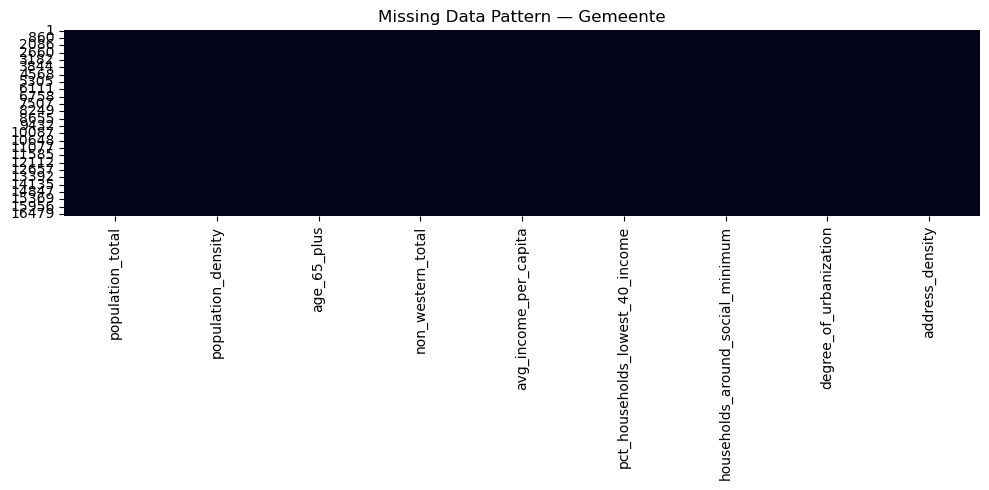

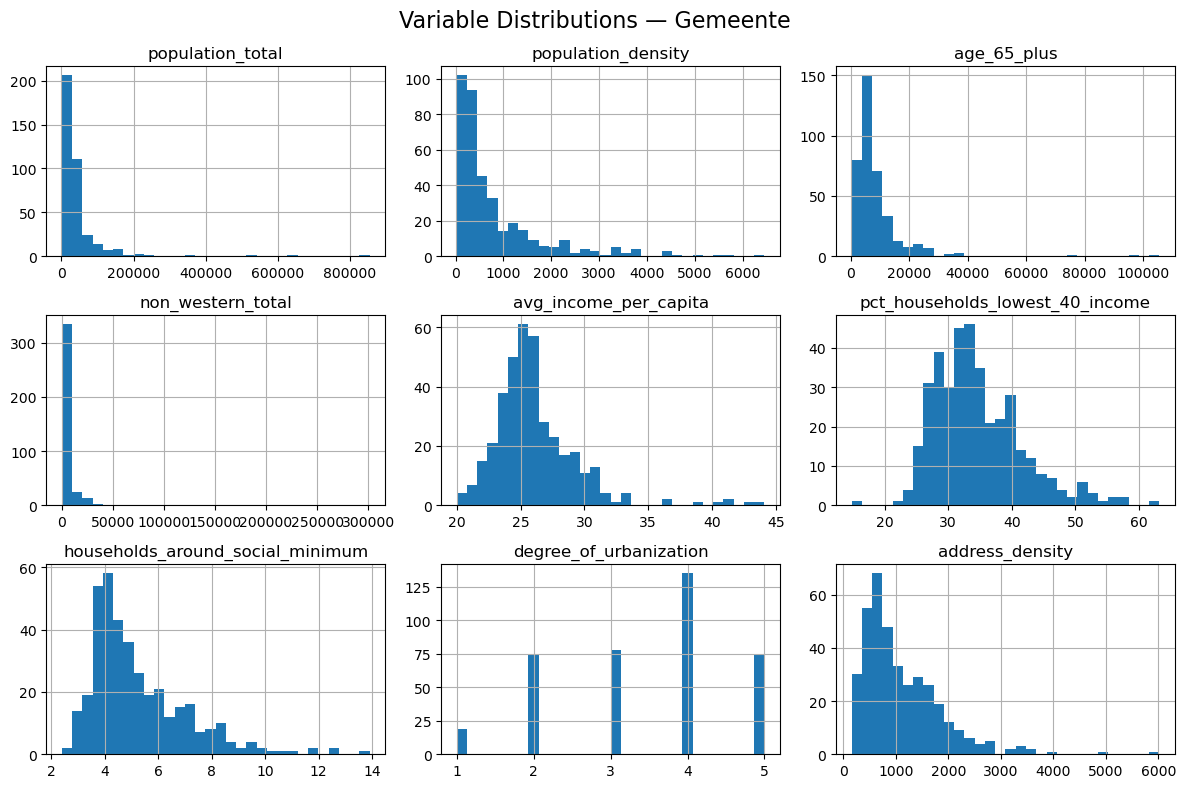

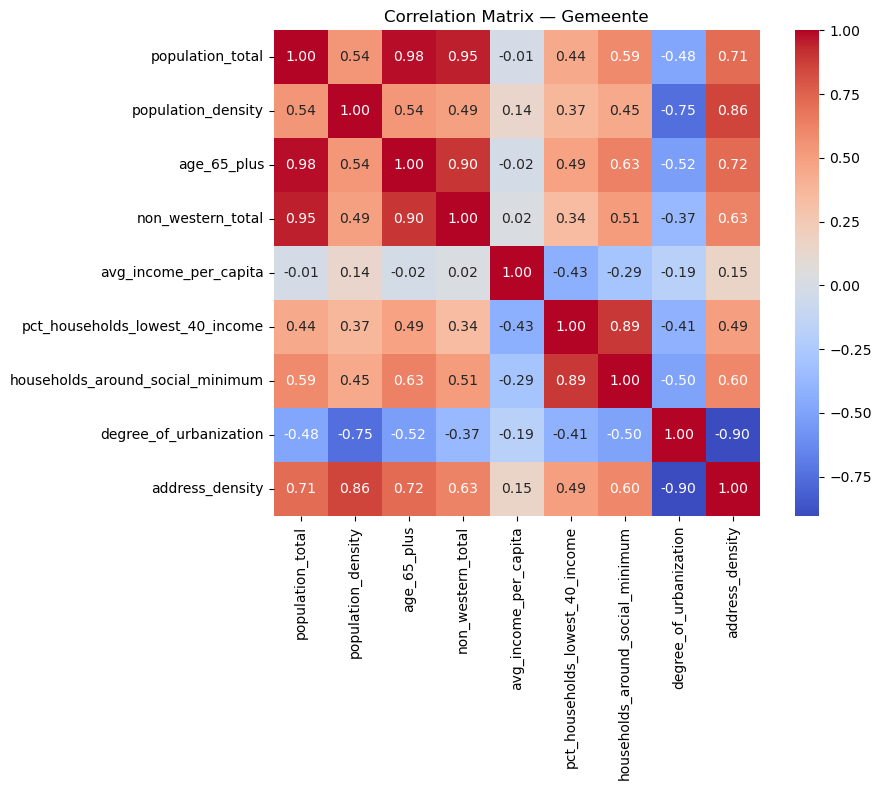

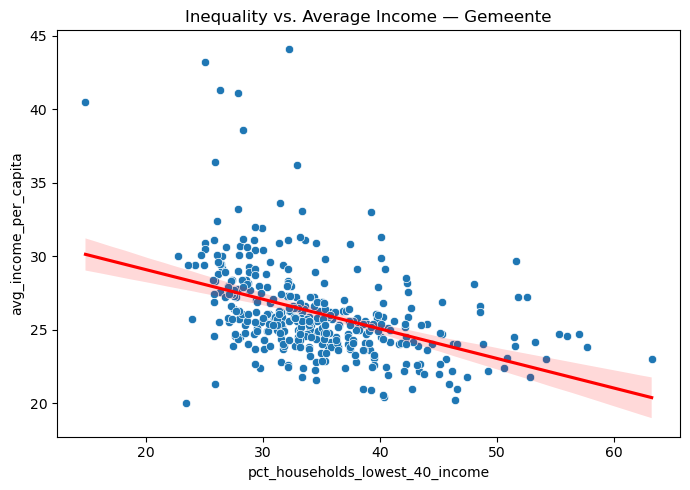

✅ Saved standardized file for Gemeente: cbs_context_variables_standardized_gemeente.csv


LEVEL: Wijk  |  n = 3086

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 2 to 16769
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   level_final                       3086 non-null   object 
 1   region_type                       3086 non-null   object 
 2   region_code                       3086 non-null   object 
 3   population_total                  3086 non-null   int64  
 4   population_density                3057 non-null   float64
 5   age_65_plus                       3086 non-null   int64  
 6   non_western_total                 3086 non-null   int64  
 7   avg_income_per_capita             2944 non-null   float64
 8   pct_households_lowest_40_income   2819 non-null   float64
 9   households_around_social_minimum  2816 non-null   float64
 10  degree_of

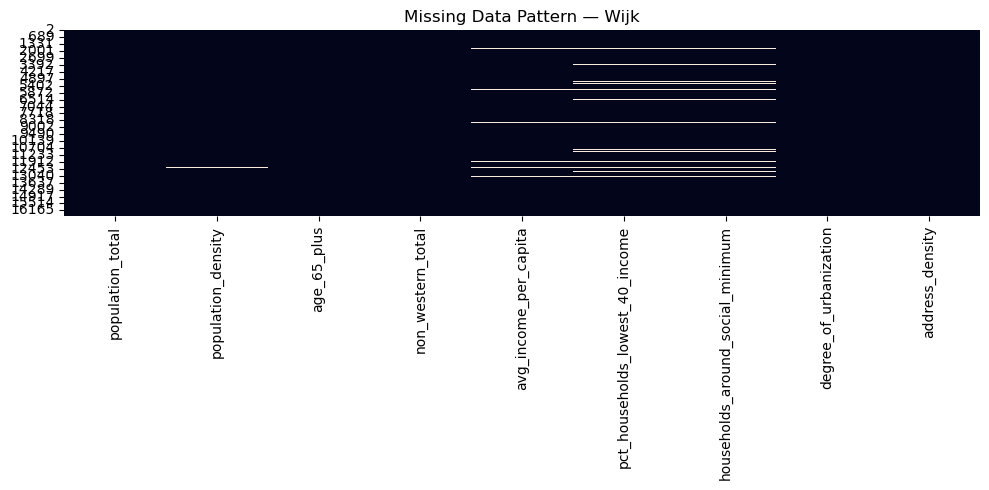

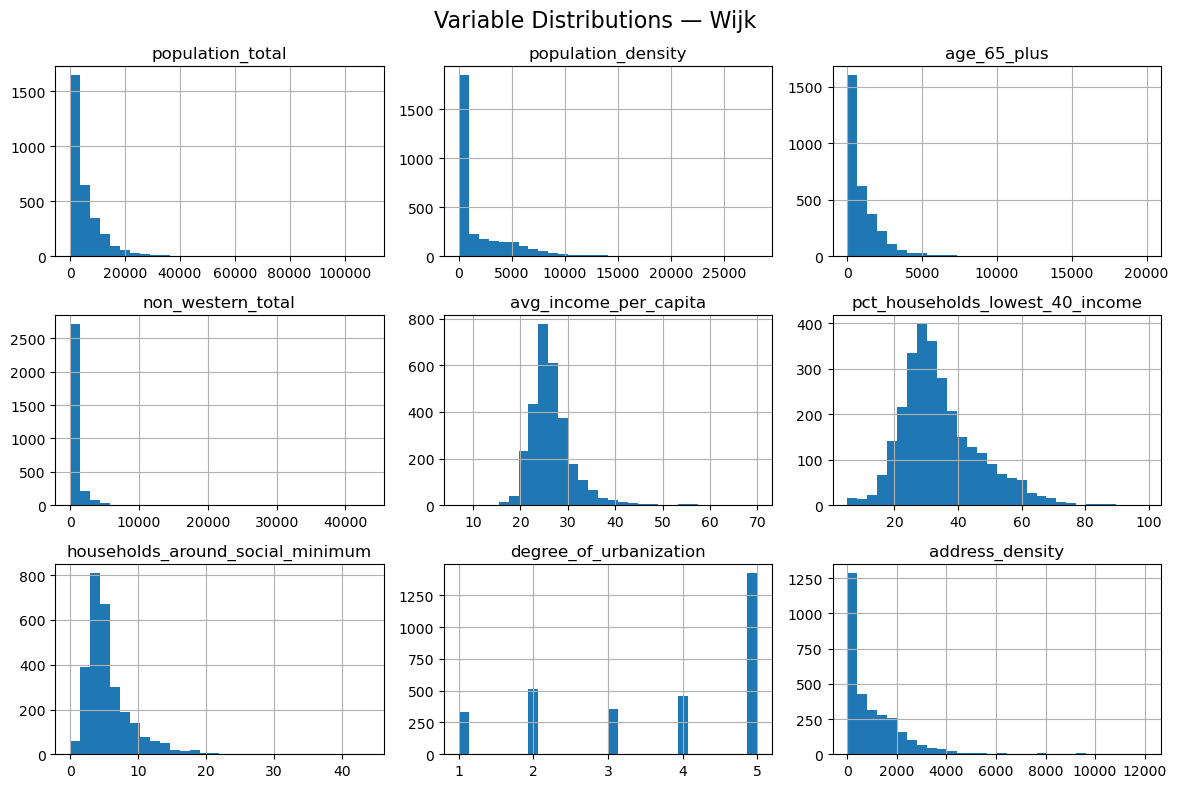

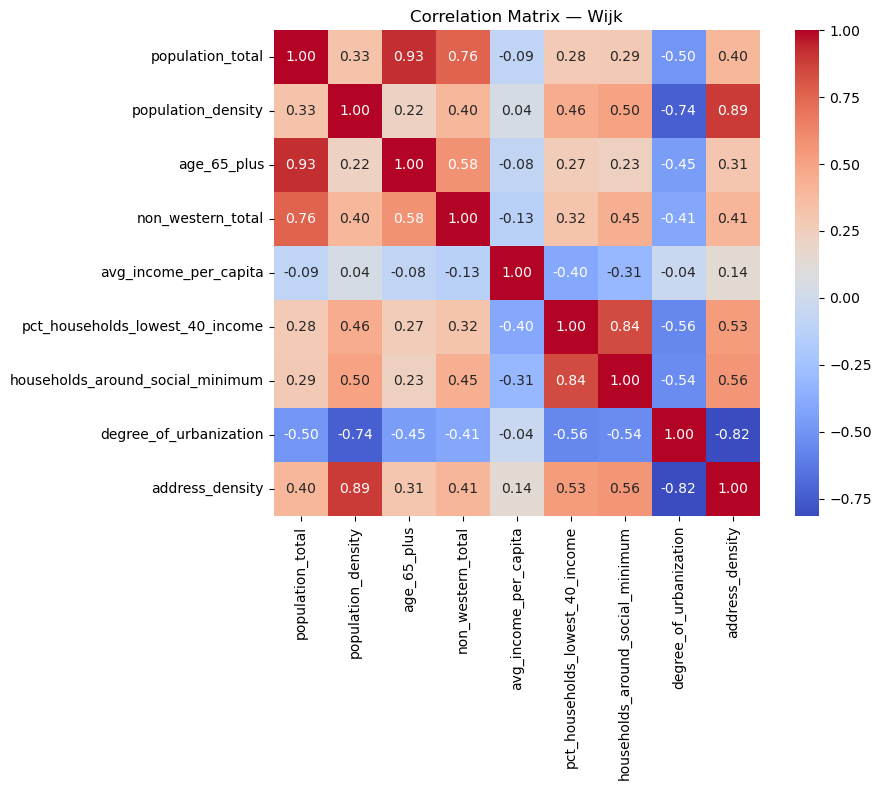

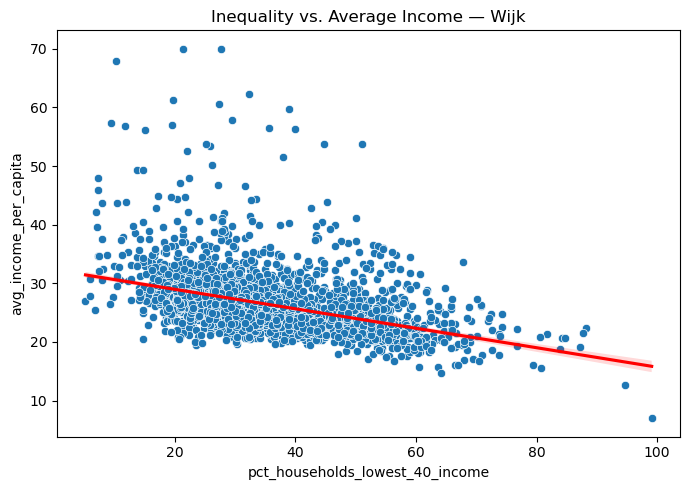

✅ Saved standardized file for Wijk: cbs_context_variables_standardized_wijk.csv


LEVEL: Buurt  |  n = 13305

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13305 entries, 3 to 16771
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   level_final                       13305 non-null  object 
 1   region_type                       13305 non-null  object 
 2   region_code                       13305 non-null  object 
 3   population_total                  13305 non-null  int64  
 4   population_density                12698 non-null  float64
 5   age_65_plus                       13305 non-null  int64  
 6   non_western_total                 13305 non-null  int64  
 7   avg_income_per_capita             10952 non-null  float64
 8   pct_households_lowest_40_income   9188 non-null   float64
 9   households_around_social_minimum  9111 non-null   float64
 10  degree_of_urba

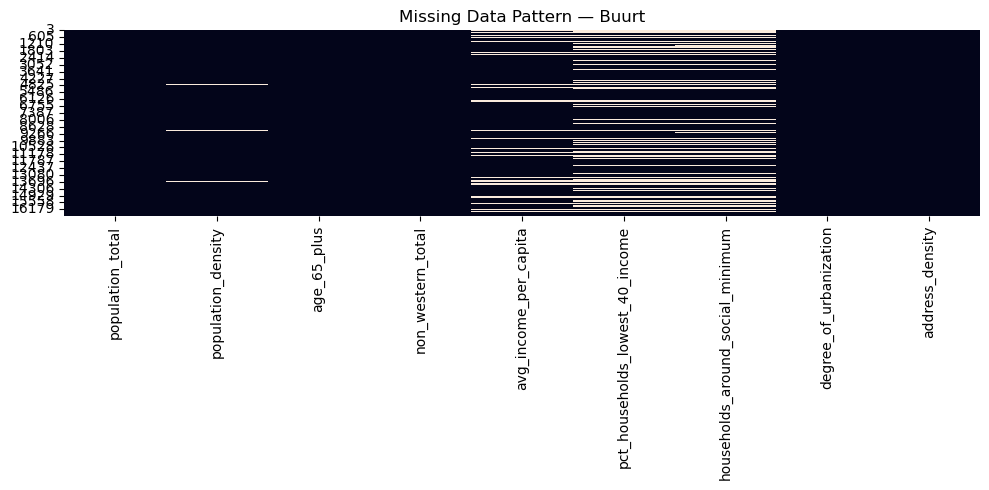

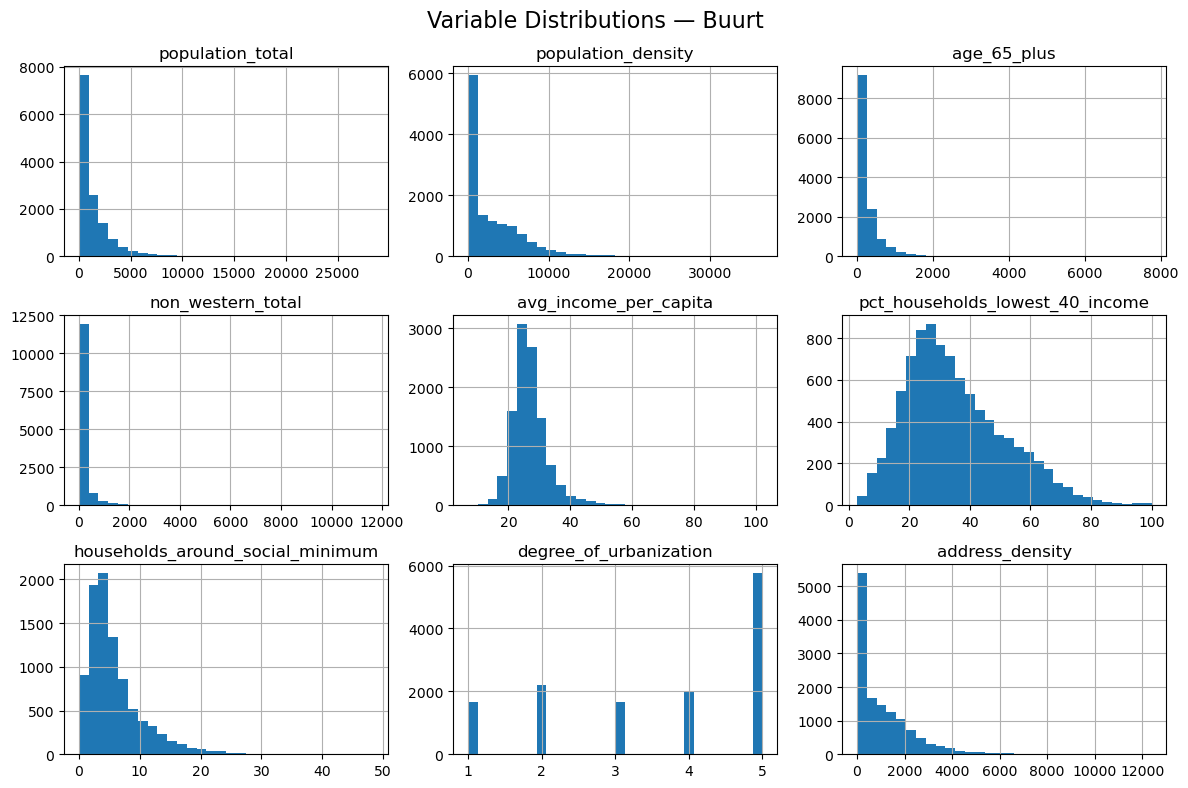

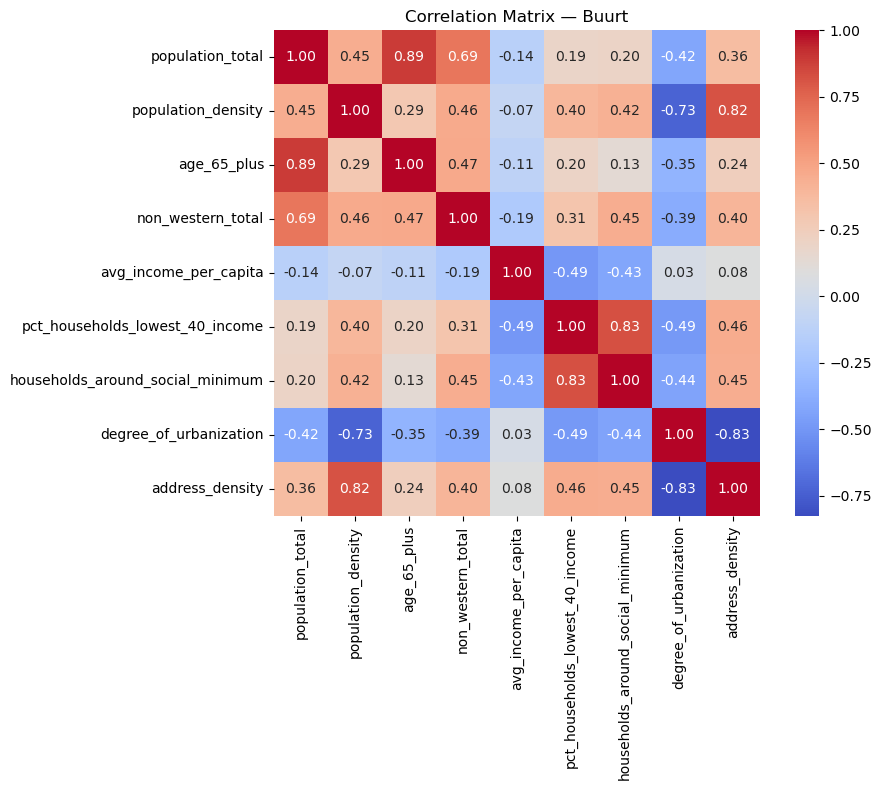

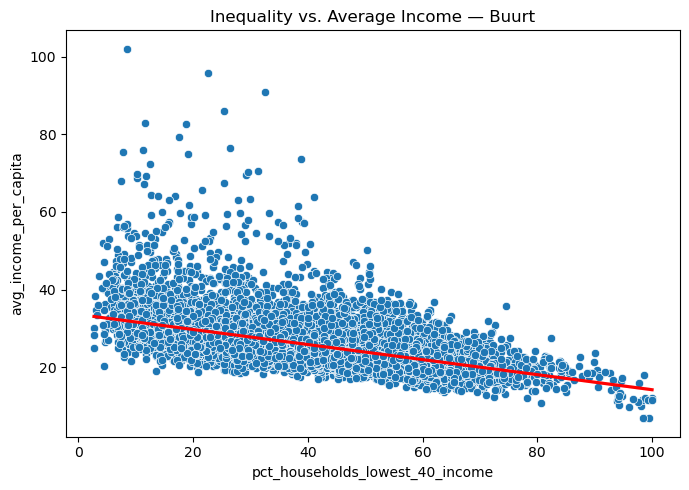

✅ Saved standardized file for Buurt: cbs_context_variables_standardized_buurt.csv



In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

LEVELS = ["Gemeente", "Wijk", "Buurt"]
NUM_VARS = [
    'population_total', 'population_density', 'age_65_plus',
    'non_western_total', 'avg_income_per_capita',
    'pct_households_lowest_40_income', 'households_around_social_minimum',
    'degree_of_urbanization', 'address_density'
]

# --- 0) Diagnostics: what do we actually have?
print("Unique region_type values (raw):")
if "region_type" in df_relevant.columns:
    print(df_relevant["region_type"].dropna().unique())
else:
    print("No 'region_type' column found.")

print("\nSample region_code head:")
if "region_code" in df_relevant.columns:
    print(df_relevant["region_code"].astype(str).head().tolist())
else:
    print("No 'region_code' column found.")

# --- 1) Normalize region_type to a canonical label
def canonicalize_region_type(s):
    if pd.isna(s):
        return np.nan
    t = str(s).strip().lower()
    mapping = {
        # Dutch
        "gemeente": "Gemeente",
        "wijk": "Wijk",
        "buurt": "Buurt",
        # English variants (just in case)
        "municipality": "Gemeente",
        "district": "Wijk",
        "neighborhood": "Buurt",
        "neighbourhood": "Buurt",
        # sometimes people include codes in here accidentally; ignore those
    }
    return mapping.get(t, None)  # None = unknown/not canonical

df = df_relevant.copy()
if "region_type" in df.columns:
    df["region_type_norm"] = df["region_type"].apply(canonicalize_region_type)
else:
    df["region_type_norm"] = None

# --- 2) Fallback using region_code prefixes if type is unknown
def infer_from_code(code):
    if pd.isna(code):
        return None
    c = str(code).strip().upper()
    if c.startswith("GM"):
        return "Gemeente"
    if c.startswith("WK"):
        return "Wijk"
    if c.startswith("BU"):
        return "Buurt"
    return None  # unknown (e.g., Land/NL00, etc.)

if "region_code" in df.columns:
    inferred = df["region_code"].apply(infer_from_code)
else:
    inferred = None

# use normalized type where available, otherwise inference from code
if inferred is not None:
    df["level_final"] = df["region_type_norm"].fillna(inferred)
else:
    df["level_final"] = df["region_type_norm"]

# explicitly drop rows that are not one of the three levels (e.g., Land/NL00)
df["level_final"] = df["level_final"].where(df["level_final"].isin(LEVELS))

# --- 3) EDA runner (unchanged logic, just uses level_final)
def run_eda_for_level(dfin, level_name):
    dfl = dfin[dfin["level_final"] == level_name].copy()
    if dfl.empty:
        print(f"⚠️ Still no rows for '{level_name}'. Check your inputs.\n")
        return

    available_vars = [c for c in NUM_VARS if c in dfl.columns]
    if not available_vars:
        print(f"⚠️ No expected numeric vars found for '{level_name}'. Skipping.\n")
        return

    print("\n" + "="*80)
    print(f"LEVEL: {level_name}  |  n = {len(dfl)}")
    print("="*80 + "\n")

    print("Info:")
    print(dfl[["level_final", "region_type", "region_code"] + available_vars].info())
    print("\nDescribe (numeric):")
    print(dfl[available_vars].describe(include='all'))

    # Missingness heatmap
    missing_counts = dfl[available_vars].isnull().sum().sort_values(ascending=False)
    print("\nMissing values per column:")
    print(missing_counts)

    plt.figure(figsize=(10, 5))
    sns.heatmap(dfl[available_vars].isnull(), cbar=False)
    plt.title(f"Missing Data Pattern — {level_name}")
    plt.tight_layout()
    plt.show()

    # Distributions
    dfl[available_vars].hist(bins=30, figsize=(12, 8))
    plt.suptitle(f"Variable Distributions — {level_name}", fontsize=16)
    plt.tight_layout()
    plt.show()

    # Correlation
    dfl_num = dfl[available_vars].apply(pd.to_numeric, errors='coerce')
    corr = dfl_num.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title(f"Correlation Matrix — {level_name}")
    plt.tight_layout()
    plt.show()

    # Bivariate
    x_col = 'pct_households_lowest_40_income'
    y_col = 'avg_income_per_capita'
    if x_col in dfl.columns and y_col in dfl.columns:
        plt.figure(figsize=(7, 5))
        sns.scatterplot(x=x_col, y=y_col, data=dfl)
        sns.regplot(x=x_col, y=y_col, data=dfl, scatter=False, color='red')
        plt.title(f"Inequality vs. Average Income — {level_name}")
        plt.tight_layout()
        plt.show()
    else:
        print(f"ℹ️ Skipping scatter/regplot for '{level_name}' (columns not present).")

    # Standardize per level
    scaler = StandardScaler()
    df_scaled = dfl.copy()
    numeric_for_scaling = [c for c in available_vars if pd.api.types.is_numeric_dtype(dfl[c])]
    df_scaled[numeric_for_scaling] = dfl[numeric_for_scaling].apply(pd.to_numeric, errors='coerce')
    df_scaled[numeric_for_scaling] = scaler.fit_transform(df_scaled[numeric_for_scaling])

    out_path = f"cbs_context_variables_standardized_{level_name.lower()}.csv"
    df_scaled.to_csv(out_path, index=False)
    print(f"✅ Saved standardized file for {level_name}: {out_path}\n")

# --- 4) Run per level
for lev in LEVELS:
    run_eda_for_level(df, lev)


### Interpretation

#### Before Transformation
- **Skewness Observations:**
  - `population_total` and `non_western_total` were extremely skewed (skewness > 120), indicating that most areas have very small values, but a few have massive populations.
  - `population_density` and `address_density` were moderately skewed (~2–3), meaning they were right-tailed but not as extreme.

#### After Log Transformation
- **Skewness Improvements:**
  - Skewness dropped drastically for all variables (now between -0.87 and 0.06).
  - Distributions appear much more symmetric and closer to normal, which is beneficial for many statistical models.
- **Histogram Patterns:**
  - Patterns in the histograms show a more even spread across the range, making trends easier to detect.

#### Degree of Urbanization
- **Categorical Nature:**
  - This variable is clearly ordinal categorical (values 1–5).
  - It should not be log-transformed or treated as continuous in regression.
  - Instead, it should be kept as a category or encoded as an


Skewness (before vs. after log1p):
                     skew_original  skew_log
variable                                   
population_total           127.72     -0.87
population_density           2.48     -0.44
non_western_total          121.52      0.06
address_density              2.91     -0.51 



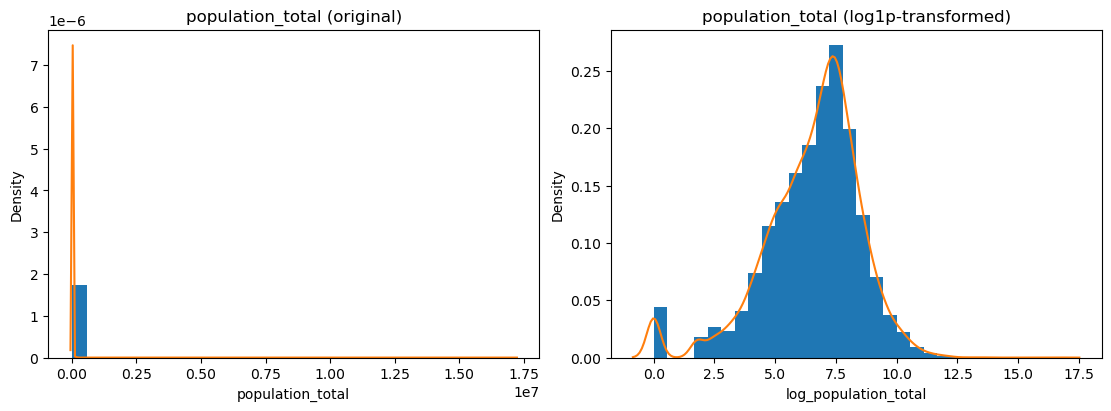

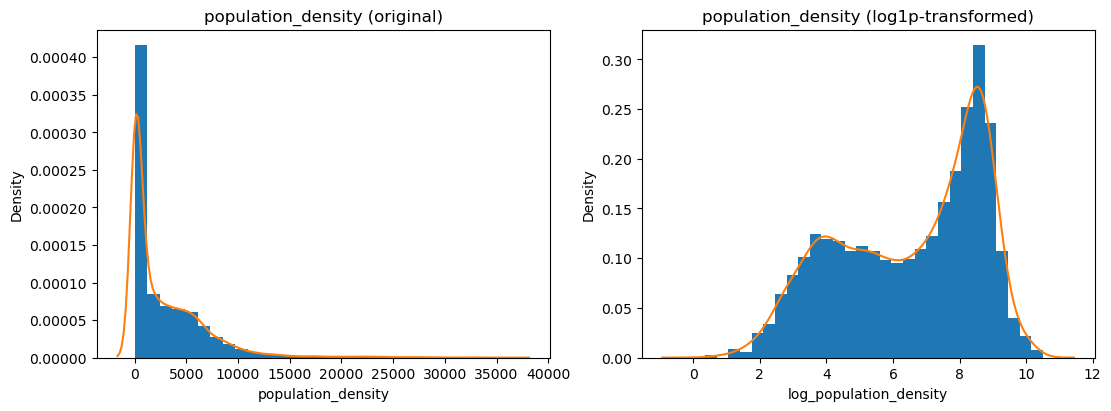

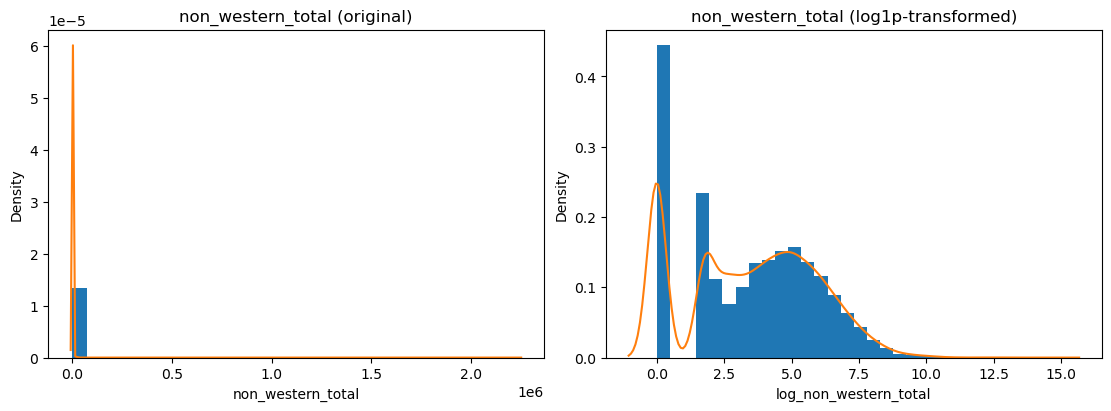

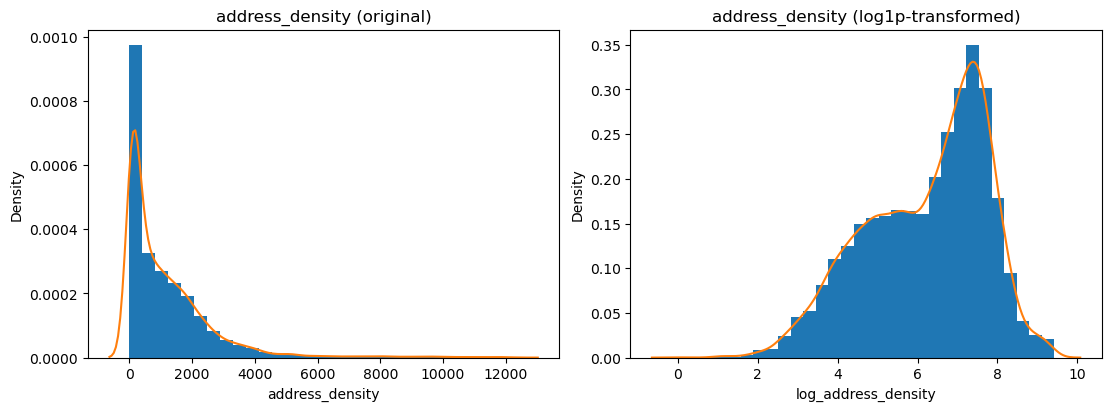

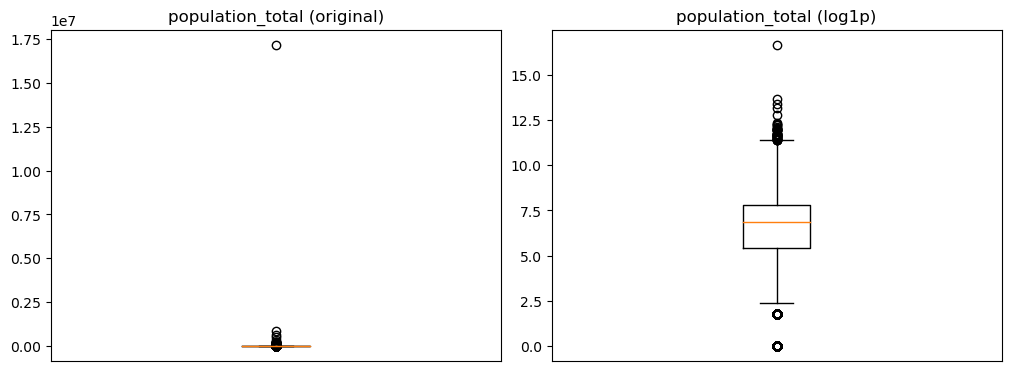

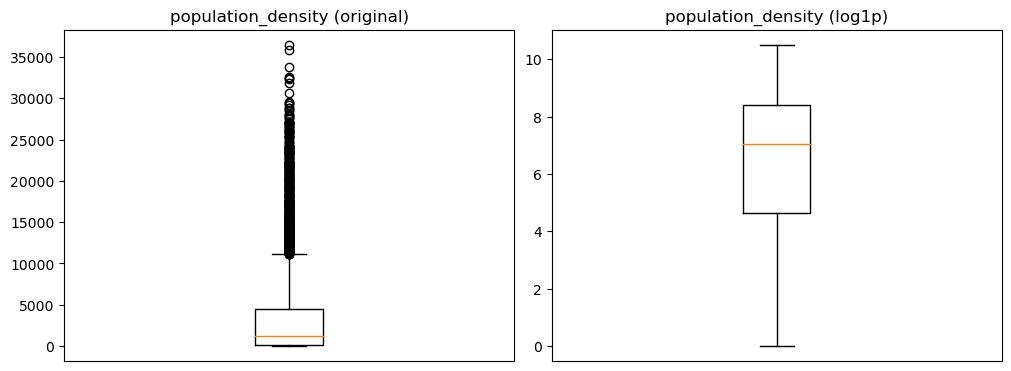

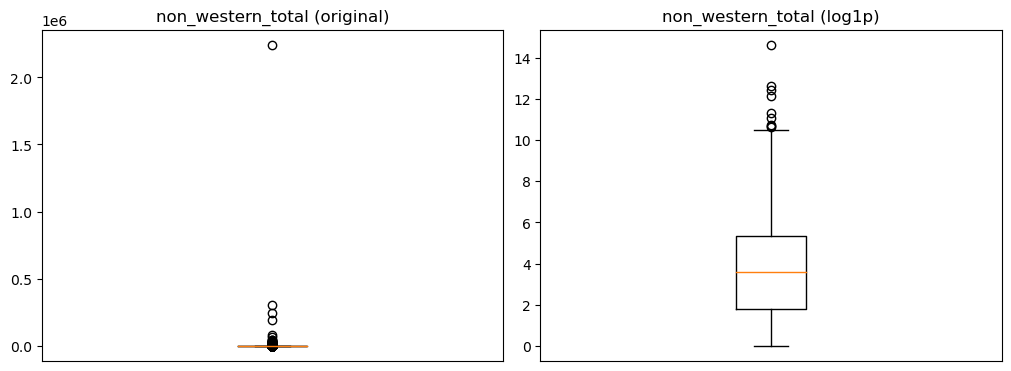

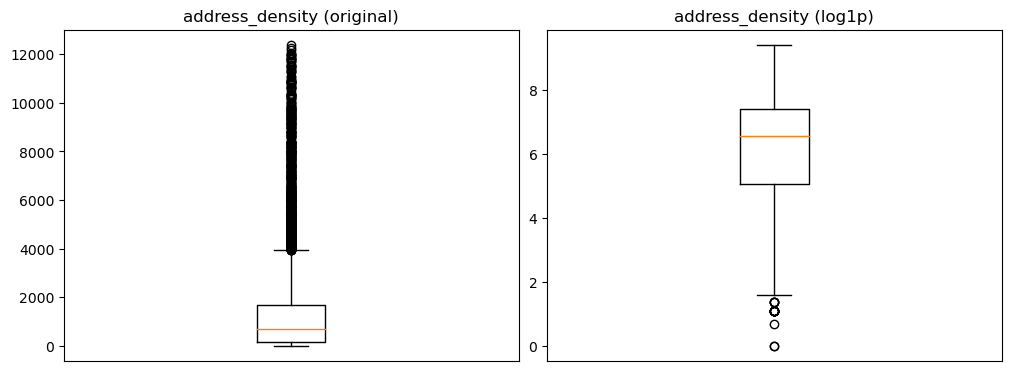

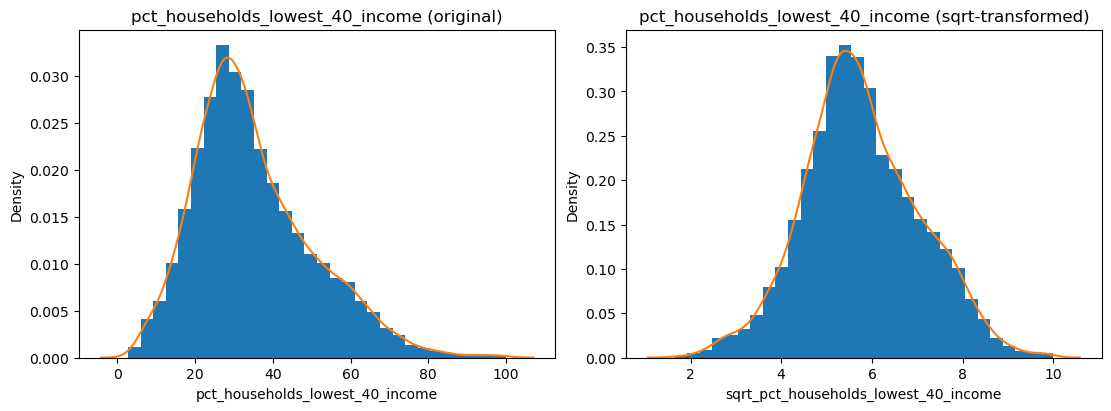

Saved: cbs_context_with_transforms.csv


In [4]:
# ================================
# Variable distribution diagnostics
# ================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# OPTIONAL: try seaborn just for KDE overlays; will gracefully skip if unavailable
try:
    import seaborn as sns
    _HAS_SEABORN = True
except Exception:
    _HAS_SEABORN = False

# ---- 0) Choose vars ----
skewed_vars = ['population_total', 'population_density', 'non_western_total', 'address_density']
ordinal_var = 'degree_of_urbanization'  # treat as ordered categorical, not continuous

# ---- 1) Make transformed columns (log1p handles zeros safely) ----
for v in skewed_vars:
    df_relevant[f'log_{v}'] = np.log1p(df_relevant[v])

# Make urbanization ordinal
if ordinal_var in df_relevant.columns:
    df_relevant['degree_of_urbanization_cat'] = pd.Categorical(
        df_relevant[ordinal_var], categories=[1, 2, 3, 4, 5], ordered=True
    )

# ---- 2) Skewness table (before/after) ----
rows = []
for v in skewed_vars:
    rows.append({
        'variable': v,
        'skew_original': float(df_relevant[v].skew(skipna=True)),
        'skew_log': float(df_relevant[f'log_{v}'].skew(skipna=True))
    })
skew_tbl = pd.DataFrame(rows).set_index('variable').round(2)
print("\nSkewness (before vs. after log1p):\n", skew_tbl, "\n")

# ---- 3) Histogram + (optional) KDE overlays, side-by-side ----
def plot_hist_pair(series, series_log, title_left, title_right, bins=30):
    fig, axes = plt.subplots(1, 2, figsize=(11, 4), constrained_layout=True)

    # original
    axes[0].hist(series.dropna(), bins=bins, density=True)
    axes[0].set_title(title_left)
    axes[0].set_xlabel("")
    axes[0].set_ylabel("Density")
    if _HAS_SEABORN:
        try:
            sns.kdeplot(x=series, ax=axes[0])
        except Exception:
            pass  # skip KDE if seaborn/scipy not available

    # transformed
    axes[1].hist(series_log.dropna(), bins=bins, density=True)
    axes[1].set_title(title_right)
    axes[1].set_xlabel("")
    axes[1].set_ylabel("Density")
    if _HAS_SEABORN:
        try:
            sns.kdeplot(x=series_log, ax=axes[1])
        except Exception:
            pass

    plt.show()

for v in skewed_vars:
    plot_hist_pair(
        df_relevant[v],
        df_relevant[f'log_{v}'],
        f"{v} (original)",
        f"{v} (log1p-transformed)"
    )

# ---- 4) Boxplots for outliers (original vs. log) ----
def boxplot_pair(series, series_log, vname):
    fig, axes = plt.subplots(1, 2, figsize=(10, 3.6), constrained_layout=True)
    axes[0].boxplot(series.dropna(), vert=True, whis=1.5, showfliers=True)
    axes[0].set_title(f"{vname} (original)")
    axes[0].set_xticks([])

    axes[1].boxplot(series_log.dropna(), vert=True, whis=1.5, showfliers=True)
    axes[1].set_title(f"{vname} (log1p)")
    axes[1].set_xticks([])

    plt.show()

for v in skewed_vars:
    boxplot_pair(df_relevant[v], df_relevant[f'log_{v}'], v)

# ---- 5) (Optional) gentle transforms for “almost normal” rates ----
# If you want to try mild transforms for rates that still have tails:
rate_vars = ['pct_households_lowest_40_income', 'households_around_social_minimum']
for v in rate_vars:
    if v in df_relevant.columns:
        df_relevant[f'sqrt_{v}'] = np.sqrt(df_relevant[v].clip(lower=0))

# Quick check on one rate variable as example
if 'pct_households_lowest_40_income' in df_relevant.columns:
    v = 'pct_households_lowest_40_income'
    fig, axes = plt.subplots(1, 2, figsize=(11, 4), constrained_layout=True)
    axes[0].hist(df_relevant[v].dropna(), bins=30, density=True)
    axes[0].set_title(f"{v} (original)")
    if _HAS_SEABORN:
        try: sns.kdeplot(x=df_relevant[v], ax=axes[0])
        except: pass

    axes[1].hist(df_relevant[f'sqrt_{v}'].dropna(), bins=30, density=True)
    axes[1].set_title(f"{v} (sqrt-transformed)")
    if _HAS_SEABORN:
        try: sns.kdeplot(x=df_relevant[f'sqrt_{v}'], ax=axes[1])
        except: pass
    plt.show()

# ---- 6) Save a modeling-ready view with both raw & transformed ----
cols_to_keep = (
    ['region_code',
     'population_total', 'population_density', 'non_western_total', 'address_density',
     'avg_income_per_capita', 'pct_households_lowest_40_income', 'households_around_social_minimum',
     'degree_of_urbanization', 'degree_of_urbanization_cat'] +
    [f'log_{v}' for v in skewed_vars] +
    [c for c in df_relevant.columns if c.startswith('sqrt_')]
)
cols_to_keep = [c for c in cols_to_keep if c in df_relevant.columns]
df_relevant[cols_to_keep].to_csv("cbs_context_with_transforms.csv", index=False)
print("Saved: cbs_context_with_transforms.csv")


### B. Check Geographic Patterns

- Since your project is about contextual effects:
  - If you have CBS region shapefiles, map variables to visualize spatial variation.
  - This can be useful to identify regional clusters

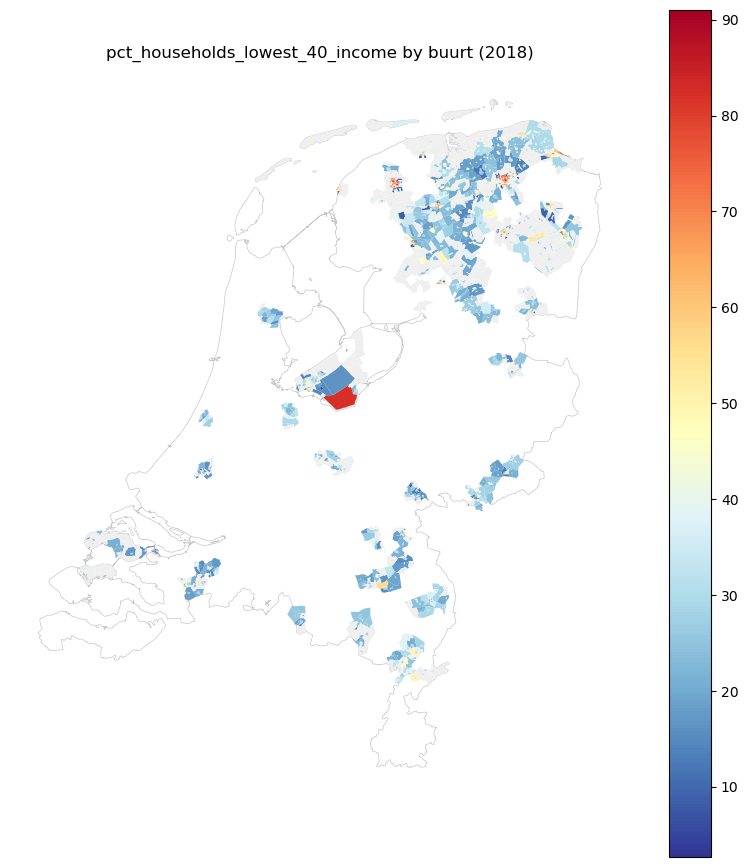

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import requests, re

# ---------------------------
# 0) Inputs
# ---------------------------
YEAR = 2018
LEVEL_DATA = "buurt"                     # level of your stats (join target)
LEVEL_BASE = "gemeente"                  # basemap level (covers the whole NL)
BASE_URL = f"https://service.pdok.nl/cbs/gebiedsindelingen/{YEAR}/wfs/v1_0"
SRS = "EPSG:4326"
PAGE = 10000

typename_data = f"gebiedsindelingen:{LEVEL_DATA}_gegeneraliseerd"
typename_base = f"gebiedsindelingen:{LEVEL_BASE}_gegeneraliseerd"

VALUE_COL = "pct_households_lowest_40_income"   # <- your metric column in df_relevant

# We'll assume you already have df_relevant with a 'region_code' like BU####### (buurt)
DF = df_relevant.copy()
DF["region_code_norm"] = DF["region_code"].astype(str).str.strip().str.upper()

def wfs_download_all(typename: str) -> gpd.GeoDataFrame:
    # hits
    hits_url = (f"{BASE_URL}?service=WFS&version=2.0.0&request=GetFeature"
                f"&typeNames={typename}&resultType=hits")
    hits_xml = requests.get(hits_url, timeout=60).text
    m = re.search(r'numberMatched="(\d+)"', hits_xml)
    total = int(m.group(1)) if m else 0
    # pages
    parts = []
    for start in range(0, total, PAGE):
        url = (f"{BASE_URL}?service=WFS&version=2.0.0&request=GetFeature"
               f"&typeNames={typename}"
               f"&outputFormat=application/json&srsName={SRS}"
               f"&startIndex={start}&count={PAGE}")
        g = gpd.read_file(url)
        if len(g) == 0: break
        parts.append(g)
    gdf = pd.concat(parts, ignore_index=True)
    return gpd.GeoDataFrame(gdf, geometry="geometry", crs=SRS)

# ---------------------------
# 1) Download layers
# ---------------------------
gdf_data = wfs_download_all(typename_data)   # buurten for the data layer
gdf_base = wfs_download_all(typename_base)   # gemeenten as basemap

# ---------------------------
# 2) Prepare join key
# ---------------------------
# Most PDOK layers expose 'statcode' with BU..., WK..., GM...
key_col = "statcode" if "statcode" in gdf_data.columns else "jrstatcode"
gdf_data["code_norm"] = gdf_data[key_col].astype(str).str.strip().str.upper()

# ---------------------------
# 3) Merge stats into the buurten layer
# ---------------------------
merged = gdf_data.merge(DF, left_on="code_norm", right_on="region_code_norm", how="left")

# ---------------------------
# 4) Make a clean basemap outline (optional but nice)
# ---------------------------
# Either plot municipalities as thin edges, or dissolve to a single outline:
nl_outline = gdf_base.dissolve(by=pd.Series(1, index=gdf_base.index), as_index=False)

# ---------------------------
# 5) Plot: basemap FIRST, then choropleth
# ---------------------------
fig, ax = plt.subplots(1, 1, figsize=(10, 11))

# (a) basemap outline — always visible, even where data are missing
nl_outline.plot(ax=ax, facecolor="white", edgecolor="#c7c7c7", linewidth=0.5, zorder=1)

# (b) municipalities as light grid (optional)
# gdf_base.boundary.plot(ax=ax, color="#e0e0e0", linewidth=0.3, zorder=2)

# (c) choropleth on top; missing polygons appear in a neutral color
merged.plot(
    ax=ax,
    column=VALUE_COL,
    cmap="RdYlBu_r",
    legend=True,
    edgecolor="none",
    zorder=3,
    missing_kwds={
        "color": "#efefef",         # fill for areas without a value after the join
        "edgecolor": "none",
        "label": "No data"
    }
)

ax.set_title(f"{VALUE_COL} by {LEVEL_DATA} ({YEAR})", fontsize=12)
ax.axis("off")
plt.show()


# Missing Data Diagnostics

## 1. `msno.matrix(df)` — Missingness Overview

**What it shows**

* Each vertical line is an observation (buurt, wijk, or gemeente, depending on your level).
* Each horizontal stripe is a variable.
* White gaps indicate missing values.

**What your image suggests**

* Most contextual variables (e.g., population density, average income, % households lowest 40%, % households around social minimum) have gaps in different rows, with some gaps coinciding across variables.
* Variables from the same CBS table tend to be missing together—likely because certain neighborhoods/regions aren’t reported in that table (e.g., small population size or data suppression).
* The dependent variable from the survey data is likely fully present for survey respondents, but won’t exist for geographic units with no respondents—explaining why certain buurten are missing in the merged set.

---

## 2. `msno.heatmap(df)` — Correlation of Missingness

**What it shows**

* A correlation matrix of missingness between variables (values from −1 to 1).

  * **1.0** = always missing together.
  * **0.0** = unrelated missingness.
  * **Negative** = when one is missing, the other is present.

**What your heatmap suggests**

* Strong positive correlations between `pct_households_lowest_40_income` and `households_around_social_minimum` indicate they almost always go missing together—probably the same CBS income source.
* `avg_income_per_capita` clusters with them, suggesting a shared source or sampling restriction in CBS reporting.
* Population/demographic variables (e.g., `age_65_plus`, `non_western_total`) show weaker or no missingness correlation because CBS generally reports them for all areas.
* If survey-based variables show negative correlation with CBS variables, it likely reflects mismatched geographic coverage: some CBS areas have no survey respondents, and some respondents’ neighborhoods don’t match CBS units.

---

## Why this matters for your project

* **Imputation strategy:** High missingness correlation suggests **joint/multivariate imputation** for groups of variables rather than variable-by-variable imputation.
* **Bias risk:** If missingness is not random (e.g., poorer areas missing more income data), multilevel models may be biased—check MCAR vs. MAR patterns.
* **Mapping effects:** Missingness yields white/unfilled regions on maps. Merging on a shapefile with an **outer join** preserves shapes even when attributes are missing.

---

## If you want, I can…

* Quantify missingness patterns (percent missing by variable and by region type).
* Highlight which areas most often lack CBS income data to inform geographic interpretation.

**Do you want me to generate that missingness table next?**


Shape: (16772, 17)

Top 20 columns by missing count:
sqrt_households_around_social_minimum    4464
households_around_social_minimum         4464
sqrt_pct_households_lowest_40_income     4384
pct_households_lowest_40_income          4384
avg_income_per_capita                    2495
log_population_density                    636
population_density                        636
degree_of_urbanization_cat                 66
log_address_density                        66
degree_of_urbanization                     66
address_density                            66
log_population_total                        0
log_non_western_total                       0
population_total                            0
non_western_total                           0
age_65_plus                                 0
region_code                                 0
dtype: int64


C:\Users\kaleb\AppData\Local\Temp\ipykernel_39428\2740654863.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x400 with 0 Axes>

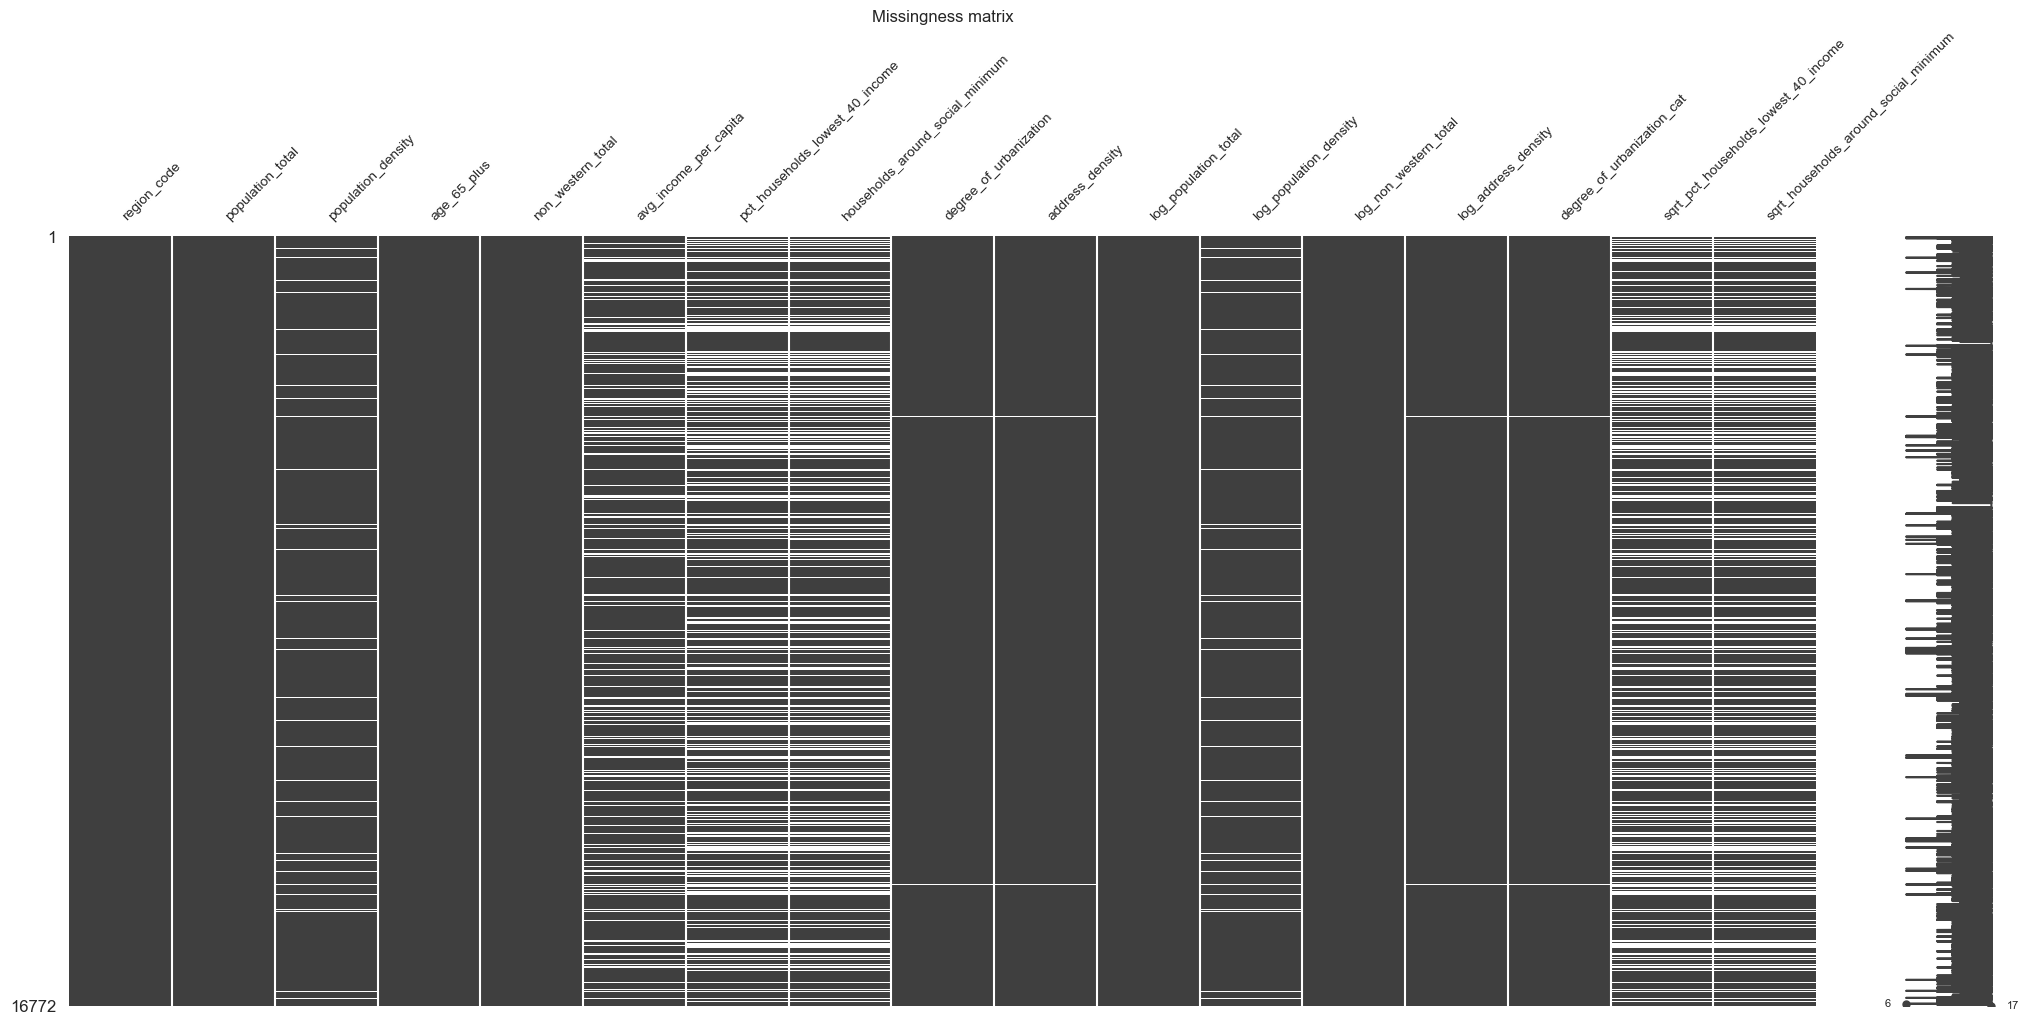

<Figure size 800x600 with 0 Axes>

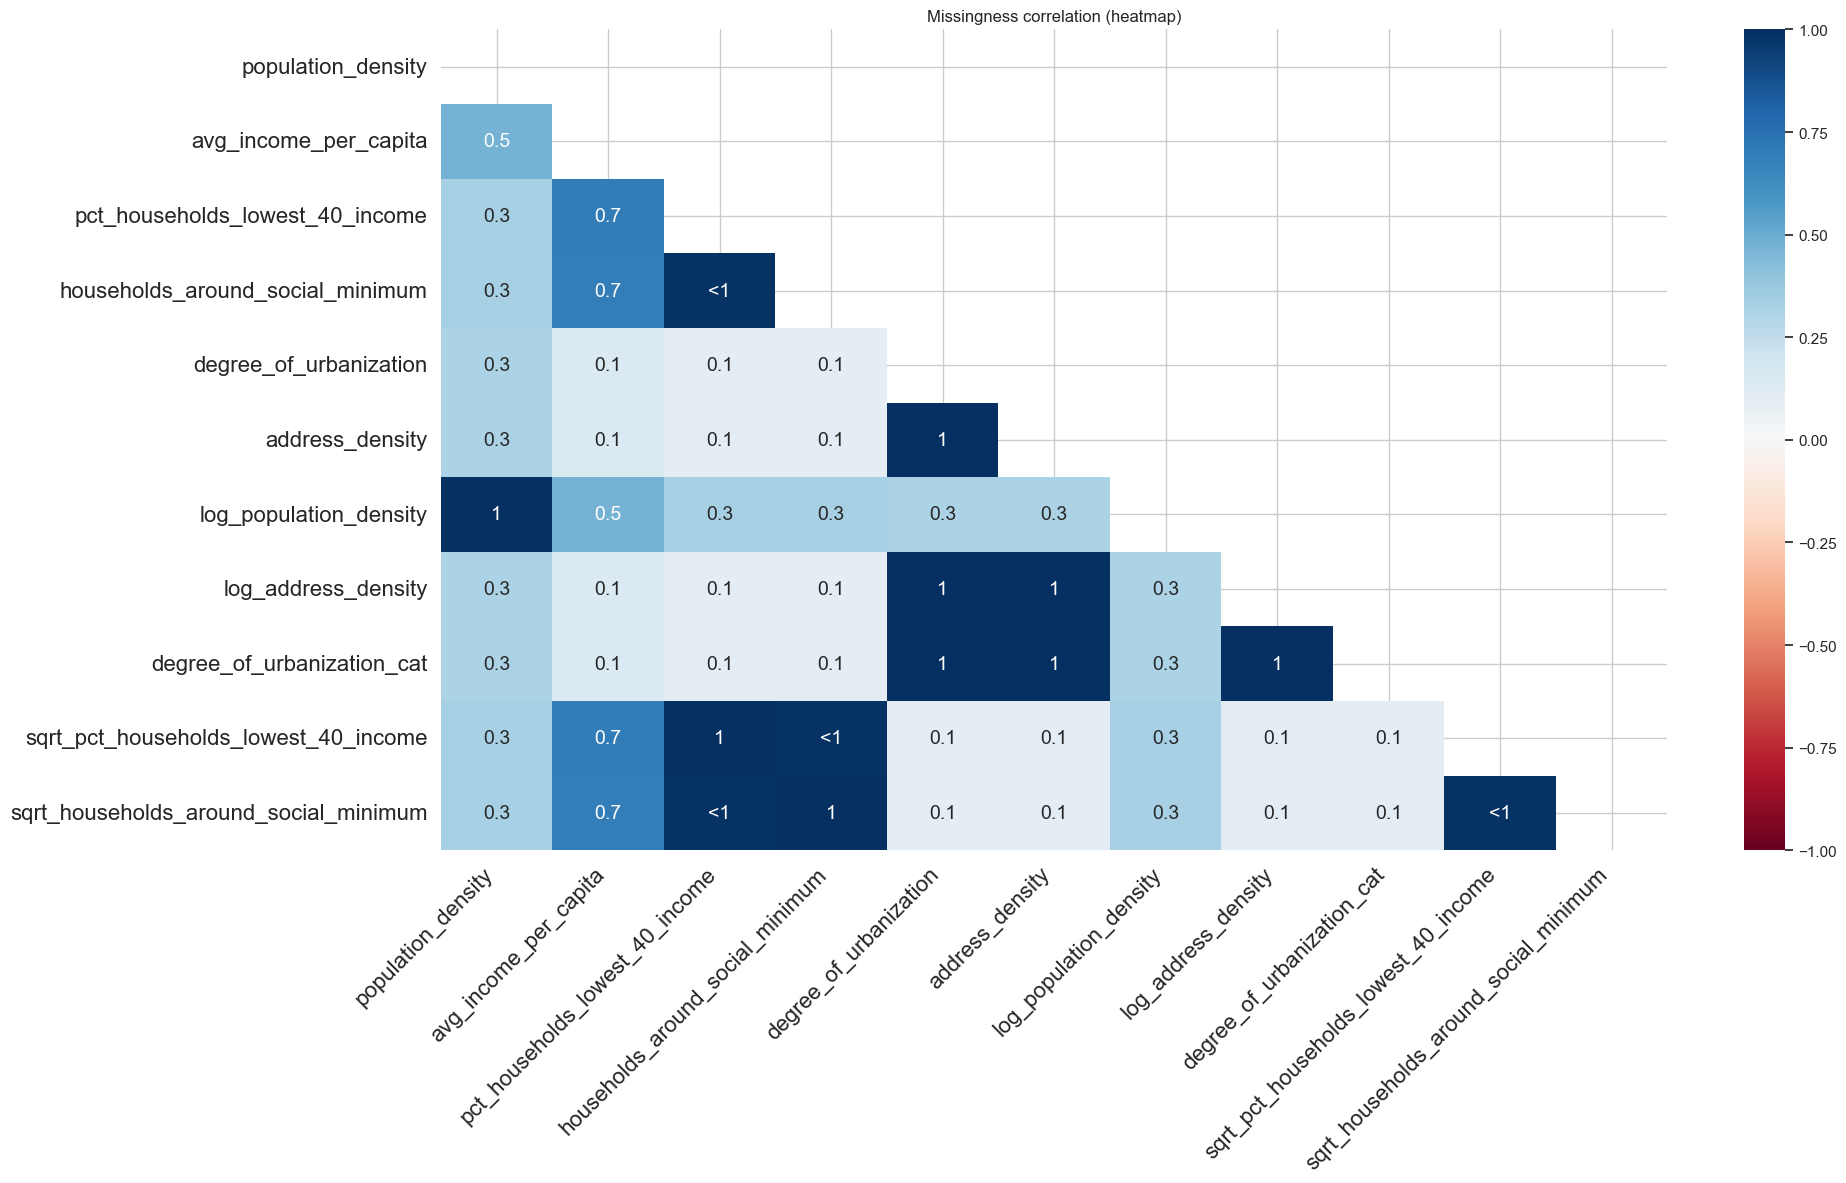

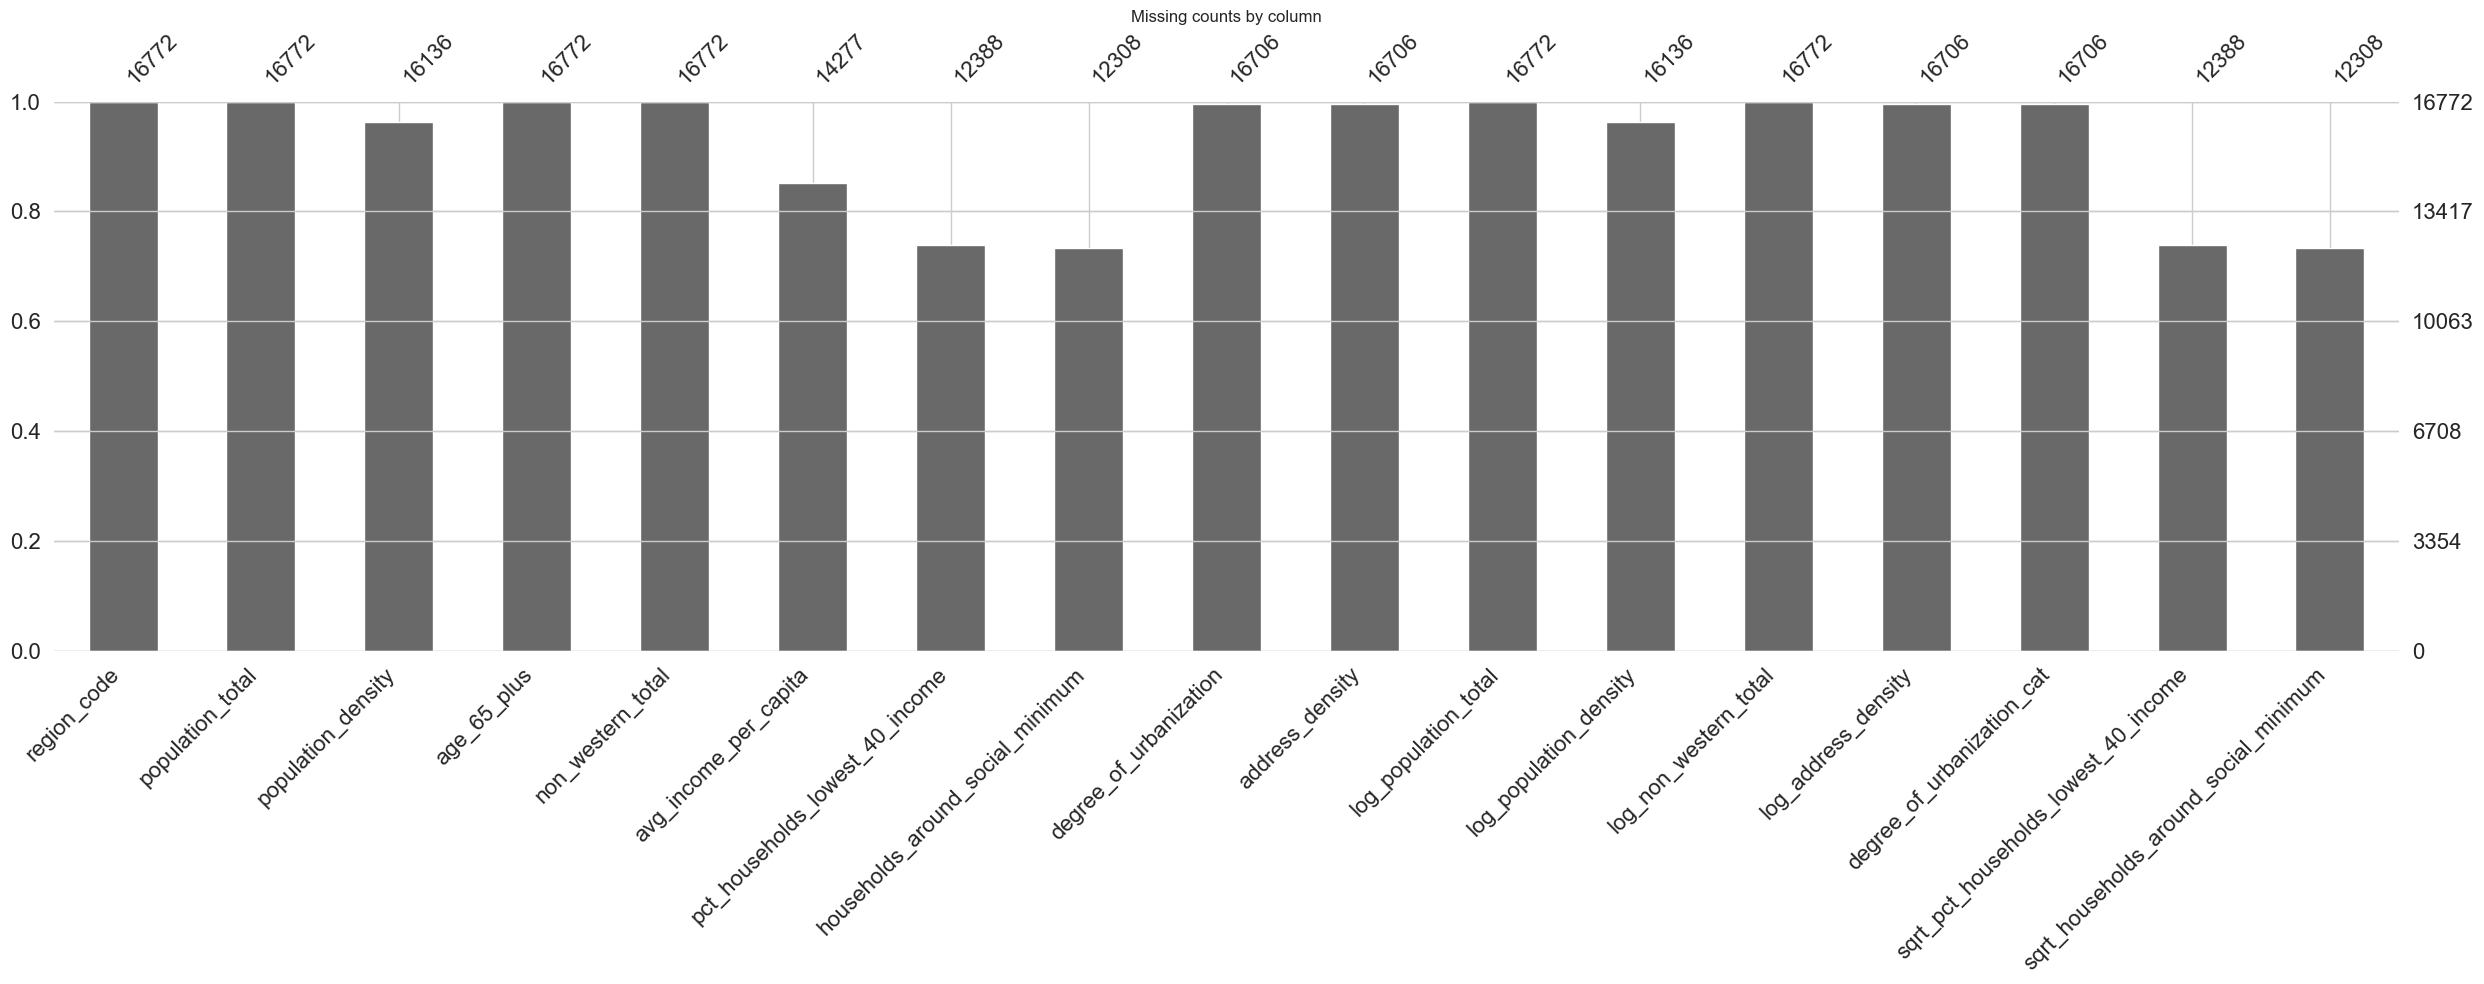


=== Missingness by variable (top 20) ===
                                       pct_missing  n_missing      n
sqrt_households_around_social_minimum     0.266158       4464  16772
households_around_social_minimum          0.266158       4464  16772
sqrt_pct_households_lowest_40_income      0.261388       4384  16772
pct_households_lowest_40_income           0.261388       4384  16772
avg_income_per_capita                     0.148760       2495  16772
log_population_density                    0.037920        636  16772
population_density                        0.037920        636  16772
degree_of_urbanization_cat                0.003935         66  16772
log_address_density                       0.003935         66  16772
degree_of_urbanization                    0.003935         66  16772
address_density                           0.003935         66  16772
log_population_total                      0.000000          0  16772
log_non_western_total                     0.000000          0

In [8]:
# =============================================================================
# Missingness Diagnostics + Report (CBS-style data)
# -----------------------------------------------------------------------------
# Works in Jupyter or as a script. Expects a DataFrame named `df_relevant`.
# Outputs:
#   - PNGs: missing_matrix.png, missing_heatmap.png, missing_bar.png
#   - CSVs: missingness_report__by_variable.csv
#           missingness_report__by_region_type.csv (if region type col exists)
#           missingness_report__regions_missing_keyvars.csv (if id cols exist)
# =============================================================================

# --- Optional: install missingno if not present ---
try:
    import missingno as msno
except ImportError:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "missingno"])
    import missingno as msno

import os
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Dict

# -------------------- Config --------------------
OUT_DIR = "missingness_outputs"
os.makedirs(OUT_DIR, exist_ok=True)

# If your DataFrame has a different name, set DF = your_df_here
DF = df_relevant  # <--- assumes you already have this in memory

# -------------------- Quick sanity checks --------------------
print("Shape:", DF.shape)
print("\nTop 20 columns by missing count:")
print(DF.isnull().sum().sort_values(ascending=False).head(20))

# -------------------- Visual diagnostics (missingno) --------------------
plt.figure(figsize=(12, 4))
msno.matrix(DF, fontsize=10)
plt.title("Missingness matrix")
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "missing_matrix.png"), dpi=150)
plt.show()

plt.figure(figsize=(8, 6))
msno.heatmap(DF, cmap="RdBu", vmin=-1, vmax=1)
plt.title("Missingness correlation (heatmap)")
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "missing_heatmap.png"), dpi=150)
plt.show()

plt.figure(figsize=(10, 4))
msno.bar(DF)
plt.title("Missing counts by column")
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "missing_bar.png"), dpi=150)
plt.show()

# -------------------- Missingness report helpers --------------------
def _first_present(candidates: List[str], cols: pd.Index) -> str | None:
    for c in candidates:
        if c in cols:
            return c
    return None

def _present(vars_list: List[str], cols: pd.Index) -> List[str]:
    return [v for v in vars_list if v in cols]

def make_missingness_report(
    df: pd.DataFrame,
    key_vars: List[str] | None = None,
    out_prefix: str = os.path.join(OUT_DIR, "missingness_report")
) -> Dict[str, pd.DataFrame]:
    """
    Creates variable-level and region-level missingness summaries and writes CSVs.
    Returns a dict of DataFrames for interactive use.
    """

    # --- Heuristics for common CBS column names (adjust if needed) ---
    candidate_region_code = [
        "buurt_code","wijk_code","gemeente_code","BU_CODE","WK_CODE","GM_CODE",
        "region_code","code"
    ]
    candidate_region_name = [
        "buurt_naam","wijk_naam","gemeente_naam","BU_NAAM","WK_NAAM","GM_NAAM",
        "region_name","naam"
    ]
    candidate_region_type = [
        "type_of_region","region_type","soort_regio","gebiedsniveau","regio_type","TypeOfArea"
    ]

    reg_code = _first_present(candidate_region_code, df.columns)
    reg_name = _first_present(candidate_region_name, df.columns)
    reg_type = _first_present(candidate_region_type, df.columns)

    # --- 1) Variable-level missingness (all columns) ---
    var_missing = (
        df.isna()
          .mean()
          .rename("pct_missing")
          .to_frame()
          .assign(n_missing=df.isna().sum(), n=df.shape[0])
          .sort_values("pct_missing", ascending=False)
    )
    var_missing.to_csv(f"{out_prefix}__by_variable.csv", index=True)

    # --- 2) Missingness by region *type* (if a type column exists) ---
    by_regtype = pd.DataFrame()
    if reg_type:
        # Percent missing for each column within each region type
        by_regtype = (
            df.groupby(reg_type)
              .apply(lambda x: x.isna().mean())
              .transpose()
        )
        by_regtype.index.name = "variable"
        by_regtype.to_csv(f"{out_prefix}__by_region_type.csv", index=True)

    # --- 3) Regions with the most missing values among key vars (if provided) ---
    if key_vars is None:
        key_vars = [
            # tweak to your exact column names:
            "pct_households_lowest_40_income",
            "households_around_social_minimum",
            "avg_income_per_capita",
            "population_density",
            "non_western_total",
            "age_65_plus",
            # example DV from survey merge:
            "DV_combined_01_one_to_zero",
        ]
    key_vars = _present(key_vars, df.columns)

    by_region = pd.DataFrame()
    if key_vars and (reg_code or reg_name):
        id_cols = [c for c in [reg_code, reg_name] if c]
        # Count of missing across key vars per region
        by_region = (
            df[id_cols + key_vars]
            .assign(missing_key_vars=lambda x: x[key_vars].isna().sum(axis=1))
            .groupby(id_cols, dropna=False, as_index=False)["missing_key_vars"]
            .sum()
            .sort_values("missing_key_vars", ascending=False)
        )
        by_region.to_csv(f"{out_prefix}__regions_missing_keyvars.csv", index=False)

    # --- Pretty prints (top lines) ---
    print("\n=== Missingness by variable (top 20) ===")
    print(var_missing.head(20))
    if not by_regtype.empty:
        print("\n=== Percent missing by region type (sample) ===")
        print(by_regtype.iloc[:10, :5])  # preview slice
    if not by_region.empty:
        print("\n=== Regions with most missing among key vars (top 20) ===")
        print(by_region.head(20))

    return {
        "by_variable": var_missing,
        "by_region_type": by_regtype,
        "regions_missing_keyvars": by_region
    }

# -------------------- Run the report --------------------
results = make_missingness_report(DF)
# Or pass your own key vars:
# results = make_missingness_report(DF, key_vars=["avg_income_per_capita", "..."])

print(f"\nAll outputs saved in: {os.path.abspath(OUT_DIR)}")


D. Pairplots for Key Variables

To visualize multiple relationships:

sns.pairplot(df[['pct_households_lowest_40_income', 'avg_income_per_capita', 
                 'households_around_social_minimum', 'degree_of_urbanization']], diag_kind='kde')

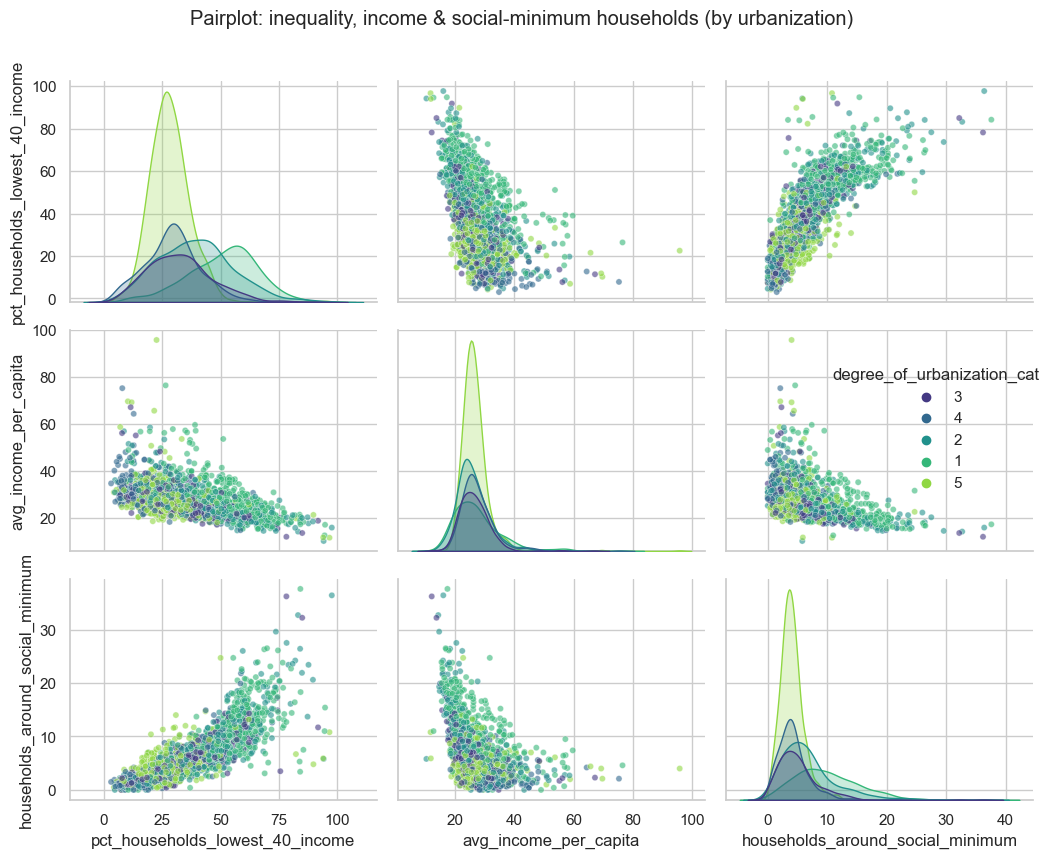

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# choose columns (use the categorical version created earlier)
cols = [
    'pct_households_lowest_40_income',
    'avg_income_per_capita',
    'households_around_social_minimum',
    'degree_of_urbanization_cat'
]

# drop rows with missing values in these columns (or sample if very large)
pp_df = df_relevant[cols].dropna().copy()
if len(pp_df) > 3000:
    pp_df = pp_df.sample(3000, random_state=1)

# ensure the urbanization category is a string (so seaborn treats it as hue levels)
pp_df['degree_of_urbanization_cat'] = pp_df['degree_of_urbanization_cat'].astype(str)

# pairplot with KDE on the diagonal and hue by urbanization
sns.set(style="whitegrid")
g = sns.pairplot(
    pp_df,
    vars=['pct_households_lowest_40_income', 'avg_income_per_capita', 'households_around_social_minimum'],
    hue='degree_of_urbanization_cat',
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 20},
    height=2.8,
    palette='viridis'
)

g.fig.suptitle("Pairplot: inequality, income & social-minimum households (by urbanization)", y=1.02)
plt.tight_layout()
g.savefig("pairplot_key_vars.png", dpi=150, bbox_inches='tight')
plt.show()

E. Multicollinearity Check

Before modeling:

from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['population_total', 'population_density', 'age_65_plus', 'non_western_total',
        'avg_income_per_capita', 'pct_households_lowest_40_income', 'households_around_social_minimum']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.dropna().values, i) for i in range(X.shape[1])]
vif["feature"] = X.columns
print(vif)